# Using the Kruksal-Wallis test for difference in medians



Assumptions: data in each group are sampled from same shape of distribution and are independent and random

In [1]:
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
df_ = pd.DataFrame.from_dict({
    "group1": [7, 14, 14, 13, 12, 9, 6, 14, 12, 8],
    "group2": [15, 17, 13, 15, 15, 13, 9, 12, 10, 8],
    "group3": [6, 8, 8, 9, 5, 14, 13, 8, 10, 9],
})
df = df_.stack().reset_index()
df = df.drop('level_0', axis=1)
df = df.rename(columns={'level_1': 'group', 0: 'value'})
df.head(10)

,group,value
0,group1,7
1,group2,15
2,group3,6
3,group1,14
4,group2,17
5,group3,8
6,group1,14
7,group2,13
8,group3,8
9,group1,13


In [3]:
le = LabelEncoder()
le.fit(df['group'])
df['group'] = le.transform(df['group'])
df

,group,value
0,0,7
1,1,15
2,2,6
3,0,14
4,1,17
5,2,8
6,0,14
7,1,13
8,2,8
9,0,13


## Different medians
Group 3 has a different median than groups 1 and 2

/tmp/ipykernel_3238020/4141304647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y="value",
/tmp/ipykernel_3238020/4141304647.py:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="group", y="value",


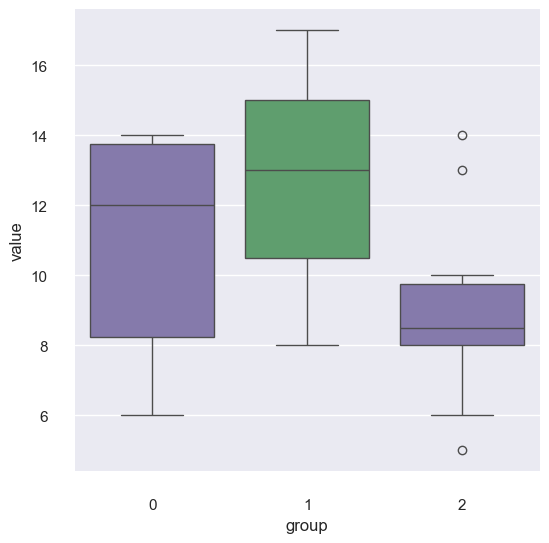

In [4]:
sns.set(rc={"figure.figsize":(6, 6)}) #width=8, #height=6
# sns.set_theme(style="ticks",palette="pastel")
sns.boxplot(x="group", y="value",
#             hue="group", 
            palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

In [5]:
stats.kruskal(df_['group1'], df_['group2'], df_['group3'])

KruskalResult(statistic=np.float64(6.287801578353988), pvalue=np.float64(0.043114289703508814))

## Interpret the results

The Kruskal-Wallis Test uses the following null and alternative hypotheses:

* The null hypothesis (H0): The median is equal across all groups.
* The alternative hypothesis: (Ha): The median is not equal across all groups.

In this case, the test statistic is 6.2878 and the corresponding p-value is 0.0431. 

> **Conclusion** 
> Since this p-value is less than 0.05, we can reject the null hypothesis that the median 
> plant growth is the same for all three fertilizers. We have sufficient evidence to conclude 
> that the type of fertilizer used leads to statistically significant differences in plant
> growth.

## Pairwise non-parametric test 
Krukal-Wallis only tells us whether there is a statically significant difference in medians, but not which groups differ from which. For that, a pair-wise analysis of the difference in medians in done with the Conover test.

See https://github.com/maximtrp/scikit-posthocs

In [6]:
import scikit_posthocs as sp
sp.posthoc_conover(df, val_col='value', group_col='group', p_adjust = 'holm')

,0,1,2
0,1.000000,0.317264,0.317264
1,0.317264,1.000000,0.032860
2,0.317264,0.032860,1.000000


Pairwise comparisons show that 
* We may **NOT** reject the null hypothesis of equivalent distributions (cdfs) for p < 0.05 for `group1`<->`group2` and `group1`<->`group3`
* But we **CAN** reject the null hypothesis for `group2`<->`group3`, which corresponds to what we see in the boxplot above: groups 2 and 3 have the biggest difference in median

Dunn test supports same conclusions

In [7]:
import scikit_posthocs as sp
posthoc = sp.posthoc_dunn([df_['group1'], df_['group2'], df_['group3']], p_adjust='bonferroni')
posthoc

,1,2,3
1,1.000000,0.550846,0.718451
2,0.550846,1.000000,0.036633
3,0.718451,0.036633,1.000000
